# Basic Data Processing and Visualization
## Ramens Ratings Dataset

This project aims to see how the level of popularity and quality of the ramen brand according to customer reviews through the existing raw data.

### The Dataset of Ramens Ratings 
	
	
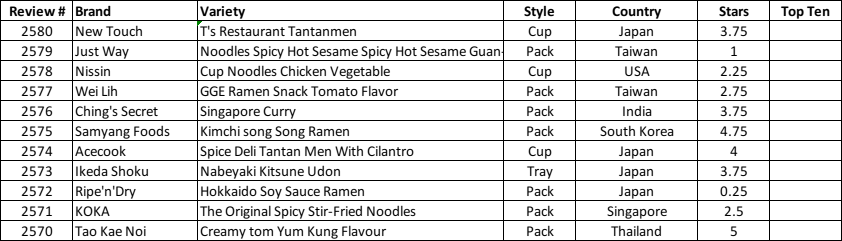

Each record in the dataset is a single ramen product review. Review numbers are contiguous: more recently reviewed ramen varieties have higher numbers. Brand, Variety (the product name), Country, and Style (Cup? Bowl? Tray?) are pretty self-explanatory. Stars indicate the ramen quality, as assessed by the reviewer, on a 5-point scale; this is the most important column in the dataset!

Source : https://www.kaggle.com/residentmario/ramen-ratings

# PART 1 : Import The Raw Data and Create Dataset 

The first step is to import raw data and then create a dataset with the appropriate headers.

In [23]:
"""
Created on Sun Nov 15 22:04:12 2020

@author: arhamze
"""

import csv
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from collections import defaultdict as dfdict


f=open('/home/arhamze/SEMESTER_7/Python Master Course/python data processing and visualization/final_project/ramen-ratings.csv') 
data=csv.reader(f, delimiter =',');


after that, let's create the dataset.

In [24]:
next(data)
##making dataset
dataset=[]
header=['Review #','Brand','Variety','Style','Country','Stars','Top Ten']
        
###menyatukan header dengan data
while True:
    for i in data:
        try:
            d=dict(zip(header,i))
            d['Review #']=int(d['Review #'])
            d['Stars']=float(d['Stars'])
        except ValueError:
            d['Stars']=0
            print ('This Unrated, so we change it with 0 ')
            pass
        dataset.append(d)   
    break
#print(dataset[:10])

This Unrated, so we change it with 0 
This Unrated, so we change it with 0 
This Unrated, so we change it with 0 


# PART 2 :Do Some Simple Statistic to The Data

The data is already cleaned and not need further conditioning process.

The thing we're going to do are:
1. Count the total of data
2. Count the average of the stars rating

In [11]:
# =============================================================================
# Statistic
# =============================================================================

#1. Total data
print ('The total of data in dataset is',len(dataset))


#2. Average of Stars Ratings
stars=[i['Stars'] for i in dataset]
average=sum(np.array(stars))/len(dataset); print ('The average from the first method is ',average)
###Or
average_2=np.average(np.array(stars)); print('The average from the second method is', average_2)

The total of data in dataset is 2580
The average from the first method is  3.6504263565891475
The average from the second method is 3.6504263565891466


# PART 3: Visualizing The Ratings Distribution from total reviews

So here we will plot the total number of ratings per each rating with bar plot. This is done to address the distribution of rating data from the total review.

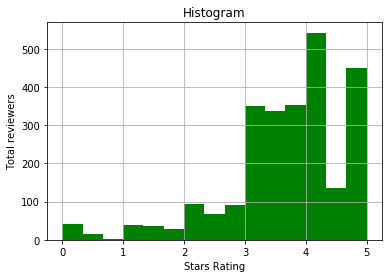

In [12]:
# =============================================================================
# Visualization
# =============================================================================

###1. Stars line plot
all_stars=[i['Stars'] for i in dataset]
all_stars.sort()

##making axis
stars_total=dfdict(int)  ###making sets of data
for i in all_stars:
    stars_total[i]+=1
#print (stars_total)
X_axis=list(stars_total.keys())
Y_axis=list(stars_total.values())

plt.figure(1)
stars_freq=[]
for stars in stars_total.keys():
    for i in range (0,stars_total.get(stars)):
        stars_freq.append(stars)
#print (stars_freq)
plt.gca().set(ylabel='Total reviewers', xlabel='Stars Rating', title='Histogram',)
plt.hist(stars_freq,bins=15, color='green')
plt.grid()
plt.show()



# PART 4 : Visualizing The Brand Popularity and Brand Top Rated

Firstly we have to calculate the brand popularity and the top rated brands.

In [8]:
# =============================================================================
# # =============================================================================
# # Calculating The Brand Popularity
# # ==============================================================================
import itertools as itr
import operator as op
import collections as clc
 

### Most popular brand 
popularity =dfdict(int)
for i in  dataset:
    popularity[i['Brand']]+=1
# print (popularity)
pop=[(popularity[i],i) for i in popularity]
pop.sort()
pop10=pop[-10:]
#print (pop10)
##top ten popularity histogram

### Best rated brand
brand_rating=dfdict(list)

for i in dataset:
    brand_rating[i['Brand']].append(i['Stars']) ###membuat dictionary brand:ratings
#print (brand_rating)

###menghitung rata2
avg_brand={}
for i in brand_rating:
    avg_brand[i] = sum(brand_rating[i])/len(brand_rating[i])
#print (avg_brand)

top_rated_brand=[(avg_brand[i],i) for i in avg_brand if len(brand_rating[i])>30]
top_rated_brand.sort()
top10_rated=top_rated_brand[-10:]; #print (top10_rated)
 
 ####SORTING THE DICTIONARY####
populer_sorted=sorted(popularity.items(), key=op.itemgetter(1), reverse=True)   ##use itemgetter (0) for sorting keys instead value
#print (populer_sorted)
pp_sorted_dict=dict(clc.OrderedDict(populer_sorted)); #print (pp_sorted_dict)
 

To make a good dataframe in determining the most popular brands and determining the brand with the highest rating, we use Pandas to store the dataframe.

In [9]:
import pandas as pd
 
data_frame=pd.DataFrame.from_dict(pp_sorted_dict, orient='index')
data_frame.reset_index(inplace=True) ###merubah index mnejadi columns
data_frame=data_frame.rename(columns={'index':'Brand',0:'Popularity'}) ####mengganti header dataframe

And now let's start visualizing it.

<BarContainer object of 10 artists>

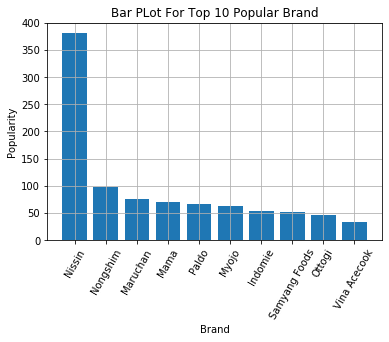

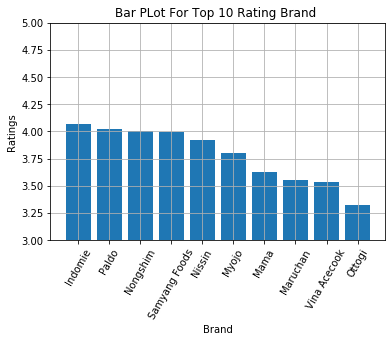

In [13]:
# =============================================================================
#  Visualization of Brand Top Popularity
# =============================================================================
plt.figure(3)
plt.gca().set(ylabel='Popularity', xlabel='Brand', title='Bar PLot For Top 10 Popular Brand')
plt.grid()
plt.xticks(rotation=60)
plt.bar(data_frame.loc[0:9,'Brand'],data_frame.loc[0:9,'Popularity'])
 
# =============================================================================
#  Visualization of Brand Top Rated
# =============================================================================
brand_top_rated=dict(clc.OrderedDict(top_rated_brand))
brnd_tp_rated_sorted=sorted(brand_top_rated.items(),key=op.itemgetter(0), reverse=True)
brnd_tp_rated_sorted_fix=dict(clc.OrderedDict(brnd_tp_rated_sorted))
df_rate=pd.DataFrame.from_dict(brnd_tp_rated_sorted_fix, orient='index')
df_rate.reset_index(inplace=True)
df_rate=df_rate.rename(columns={'index':'Rating', 0:'Brand'})
#print (df_rate)

plt.figure (4)
plt.gca().set(ylabel='Ratings', xlabel='Brand', title='Bar PLot For Top 10 Rating Brand ', ylim=(3,5))
plt.grid()
plt.xticks(rotation=60)
plt.bar(df_rate.loc[0:9,'Brand'],df_rate.loc[0:9,'Rating'])


#sorted_values = sorted(popularity.values()) # Sort the values
#popularity_sorted= {}
#for i in sorted_values:
#    for k in popularity.keys():
#        if popularity[k] == i:
#            popularity_sorted[k] = popularity[k]
#            break
#print (popularity_sorted)

###  This is the end, enjoy and thank you